#  Build a Naive Bayes model 

## Step 1: Imports

In [25]:
# Import relevant libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players.csv')

### Display the data

Review the first 10 rows of data.

In [6]:
# Display the first 10 rows of data.

extracted_data.head(10)



,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [7]:
# Define the y (target) variable.

y=extracted_data["target_5yrs"]


# Define the X (predictor) variables.

x=extracted_data.copy()
x=x.drop("target_5yrs",axis=1)


### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [8]:
# Display the first 10 rows of your target data.

y.head(10)



0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [9]:
# Display the first 10 rows of your predictor variables.

x.head(10)


,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [12]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.


X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)


### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [46]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

print("Shape of train-test split:")
print("X_train shape:", X_train.shape)



# Print the shape of X_test.

print("Shape of X_test:")
print(X_test.shape)


# Print the shape of y_train.

print("Shape of y_train:")
print(y_train.shape)



# Print the shape of y_test.

print("Shape of y_test:")
print(y_test.shape)



Shape of train-test split:
X_train shape: (1005, 10)
Shape of X_test:
(335, 10)
Shape of y_train:
(1005,)
Shape of y_test:
(335,)


## Step 3: Model building

In [16]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb=GaussianNB()




# Fit the model on your training data.

nb.fit(X_train,y_train)



# Apply your model to predict on your test data. Call this "y_pred".

y_pred=nb.predict(X_test)



## Step 4: Results and evaluation


In [20]:
# Print your accuracy score.

print('accuracy:', '%.3f' %accuracy_score(y_test,y_pred))



# Print your precision score.

print("precision:",'%.3f' %precision_score(y_test,y_pred))



# Print your recall score.

print("recall:",'%.3f' %recall_score(y_test,y_pred))



# Print your f1 score.

print("f1:",'%.3f' % f1_score(y_test,y_pred))



accuracy: 0.627
precision: 0.779
recall: 0.558
f1: 0.650


### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

[[ 94  33]
 [ 92 116]]


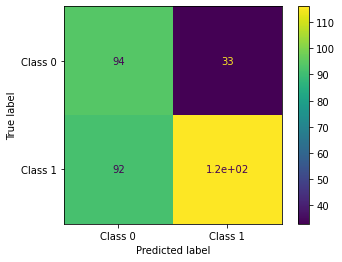

In [45]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

cm = confusion_matrix(y_test, y_pred)
print(cm)



# Create the display for your confusion matrix.

cm = confusion_matrix(y_test, y_pred)
classes = ["Class 0", "Class 1",]  # Replace with your actual class labels

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()



# Plot the visual in-line.

%matplotlib inline

